<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/NNs/Exercise_1_nn_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - building neural networks using TensorFlow

1. Start by replicating the neural network in the slides (not the training - building it and using the method $\texttt{.summary}$. You can see the number of parameters in each layer. Can you relate this to the number of features, the number of hidden nodes, and the number of output nodes?
2. Do you believe the model has too many parameters? Too few? Try to change the number of parameters (in whichever direction you believe is best) and then train the model on the breast cancer data. Is your model better than the one in the slides? **Bonus**: try also to change the number of epochs you train for, as well as anything else you might want to experiment with.

**Note**: The number of epochs is the number of times the neural network sees each observation. In the above example, each observation is shown 5 times.

**See slides for more details!**

# Exercise 1

Start by replicating the neural network in the slides (not the training - building it and using the method $\texttt{.summary}$. You can see the number of parameters in each layer. Can you relate this to the number of features, the number of hidden nodes, and the number of output nodes?

In [104]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

seed = 42
tf.random.set_seed(seed)

In [105]:
my_nn = Sequential([
    Dense(64, activation = 'relu', input_shape = (30,)), # input shape required in the first layer
    Dense(128, activation = 'relu'), # map 64 to 128 features and apply ReLU
    Dense(2, activation = 'softmax') # softmax is used for classification
    ])

my_nn.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 64)                1984      
                                                                 
 dense_83 (Dense)            (None, 128)               8320      
                                                                 
 dense_84 (Dense)            (None, 2)                 258       
                                                                 
Total params: 10,562
Trainable params: 10,562
Non-trainable params: 0
_________________________________________________________________


# Exercise 2

Do you believe the model has too many parameters? Too few? Try to change the number of parameters (in whichever direction you believe is best) and then train the model on the breast cancer data. Is your model better than the one in the slides? **Bonus**: try also to change the number of epochs you train for, as well as anything else you might want to experiment with.

In [106]:
# Use the `load_breast_cancer` function to construct your dataset
X, y = load_breast_cancer(return_X_y = True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = seed)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

(455, 30) (114, 30) (455,) (114,)


In [107]:
# Build your own, new neural network here
model = Sequential()

# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(32, input_shape = (30,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(64))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(32))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 32)                992       
                                                                 
 activation_32 (Activation)  (None, 32)                0         
                                                                 
 dense_86 (Dense)            (None, 64)                2112      
                                                                 
 activation_33 (Activation)  (None, 64)                0         
                                                                 
 dense_87 (Dense)            (None, 32)                2080      
                                                                 
 activation_34 (Activation)  (None, 32)                0         
                                                                 
 dense_88 (Dense)            (None, 1)               

In [108]:
# Compile it, train it, and evaluate it
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )


history = model.fit(Z_train,
                    y_train,
                    validation_data = (Z_test, y_test),
                    epochs = 100,
                    )

loss, accuracy = model.evaluate(Z_test,
                                y_test
                                )

print(f'\nOur first neural network managed {round(accuracy * 100, 2)}% accuracy.')
print(f'\nOur first neural network managed {round(loss, 2)} loss.')

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 0.6616 - accuracy: 0.6286 - val_loss: 0.6540 - val_accuracy: 0.6228
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 0.6286 - val_loss: 0.6304 - val_accuracy: 0.6228
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6164 - accuracy: 0.6286 - val_loss: 0.5975 - val_accuracy: 0.6228
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5800 - accuracy: 0.6462 - val_loss: 0.5437 - val_accuracy: 0.7105
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5192 - accuracy: 0.7055 - val_loss: 0.4676 - val_accuracy: 0.8070
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8725 - val_loss: 0.3732 - val_accuracy: 0.9298
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3522 - accuracy: 0.9253 - val_loss: 0.2860 - val_accuracy: 0.9474
Epoch 8/100


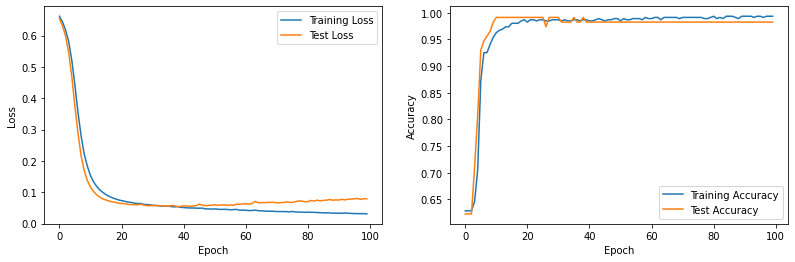

In [109]:
fig = plt.figure(figsize = plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'],
        label = 'Training Loss')

ax.plot(history.history['val_loss'],
        label = 'Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'],
        label = 'Training Accuracy')

ax.plot(history.history['val_accuracy'],
        label = 'Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()